In [1]:
!pip install pysift

/bin/bash: /home/mds3/Downloads/m@y99098/lib/libtinfo.so.6: no version information available (required by /bin/bash)
DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
cv2.__version__

NameError: name 'cv2' is not defined

In [3]:
import numpy as np

In [6]:
sift = cv2.SIFT_create()

gray = cv2.imread('/home/mds3/Downloads/face1.jpeg', 0)
kp, desc = sift.detectAndCompute(gray,None)

In [5]:
import cv2

In [8]:
desc.shape

(302, 128)

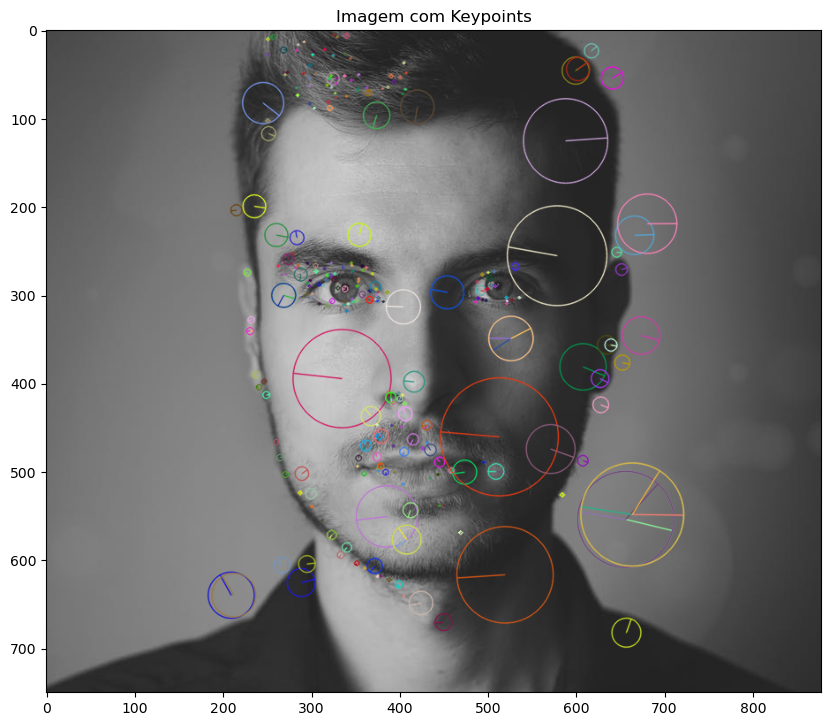

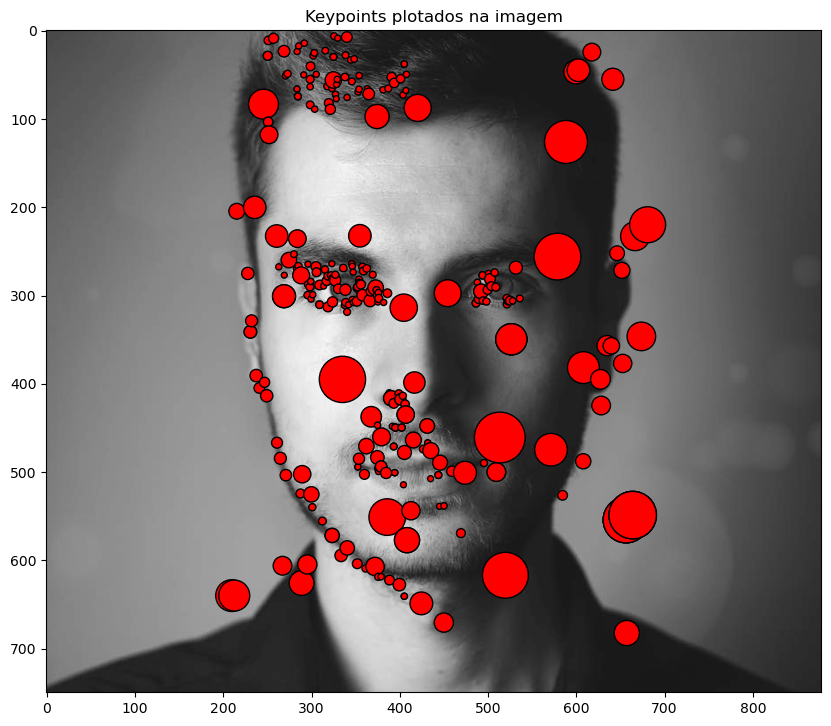

In [16]:
img_with_keypoints = cv2.drawKeypoints(gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Salvar a imagem com os keypoints
#cv2.imwrite('image-with-keypoints.jpg', img_with_keypoints)

# Extrair as características dos keypoints e salvar como array
keypoints_array = np.array([[keypoint.pt[0], keypoint.pt[1], keypoint.size] for keypoint in kp])

# Salvar o array de keypoints
np.save('keypoints.npy', keypoints_array)

# Carregar o array de keypoints (se necessário)
# keypoints_array = np.load('keypoints.npy')

# Plotar a imagem com os keypoints
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Imagem com Keypoints')
plt.show()

# Plotar os keypoints separadamente
plt.figure(figsize=(10, 10))
plt.imshow(gray, cmap='gray')
plt.scatter(keypoints_array[:, 0], keypoints_array[:, 1], c='r', s=keypoints_array[:, 2]*10, edgecolors='k')
plt.title('Keypoints plotados na imagem')
plt.show()

In [12]:
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(gray ,
                      kp ,
                      gray ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
#cv2.imwrite('image-with-keypoints.jpg', img)


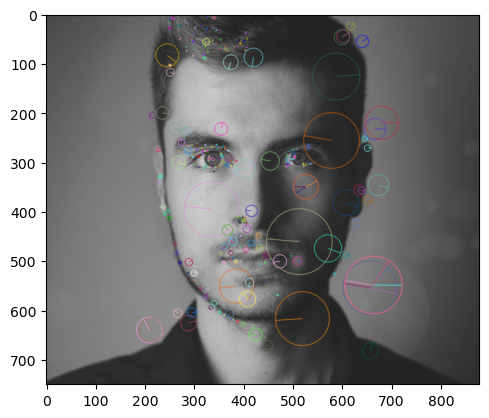

In [13]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [1]:
%cd '/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/codesextractors/execute/'

[Errno 2] No such file or directory: '/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/extractors/execute/'
/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/Notebooks/Processing


dataset LCCFASD
conjunto LCC_FASD_development
BSIF
lbp
lpq


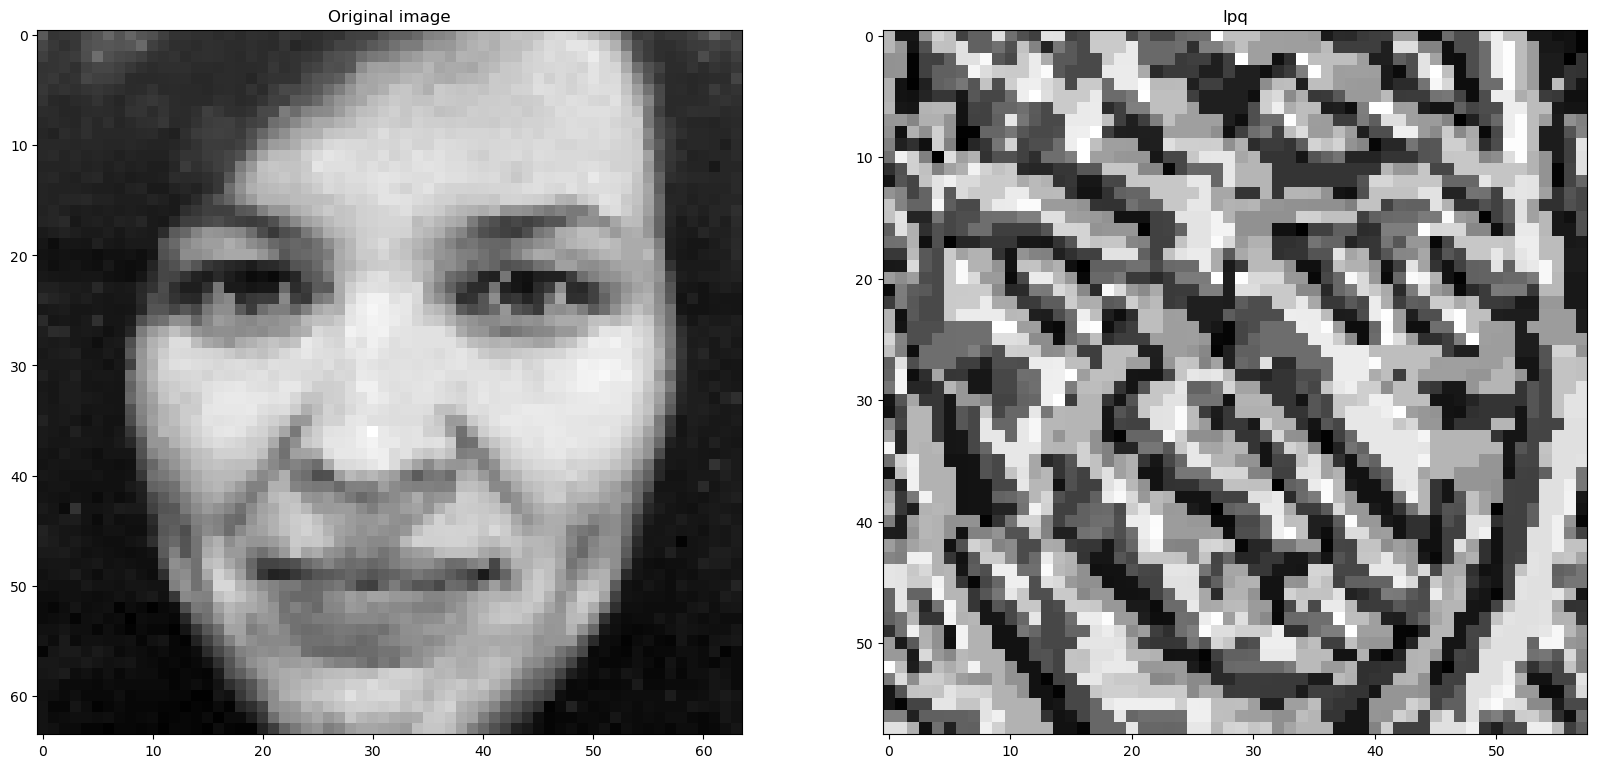

sift
(28, 3)
BSIF
lbp
lpq


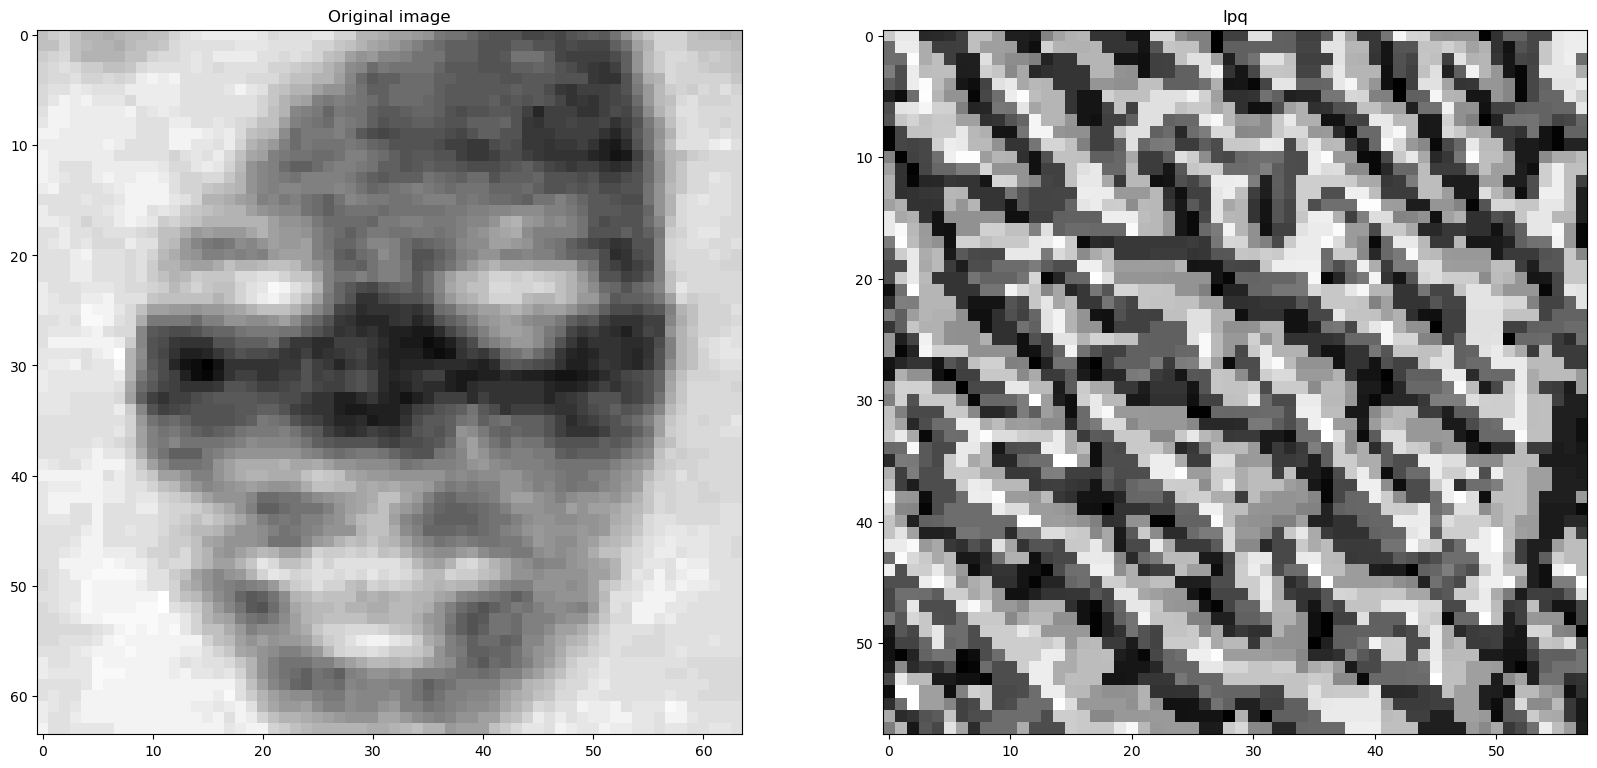

sift
(0,)
BSIF
lbp
lpq


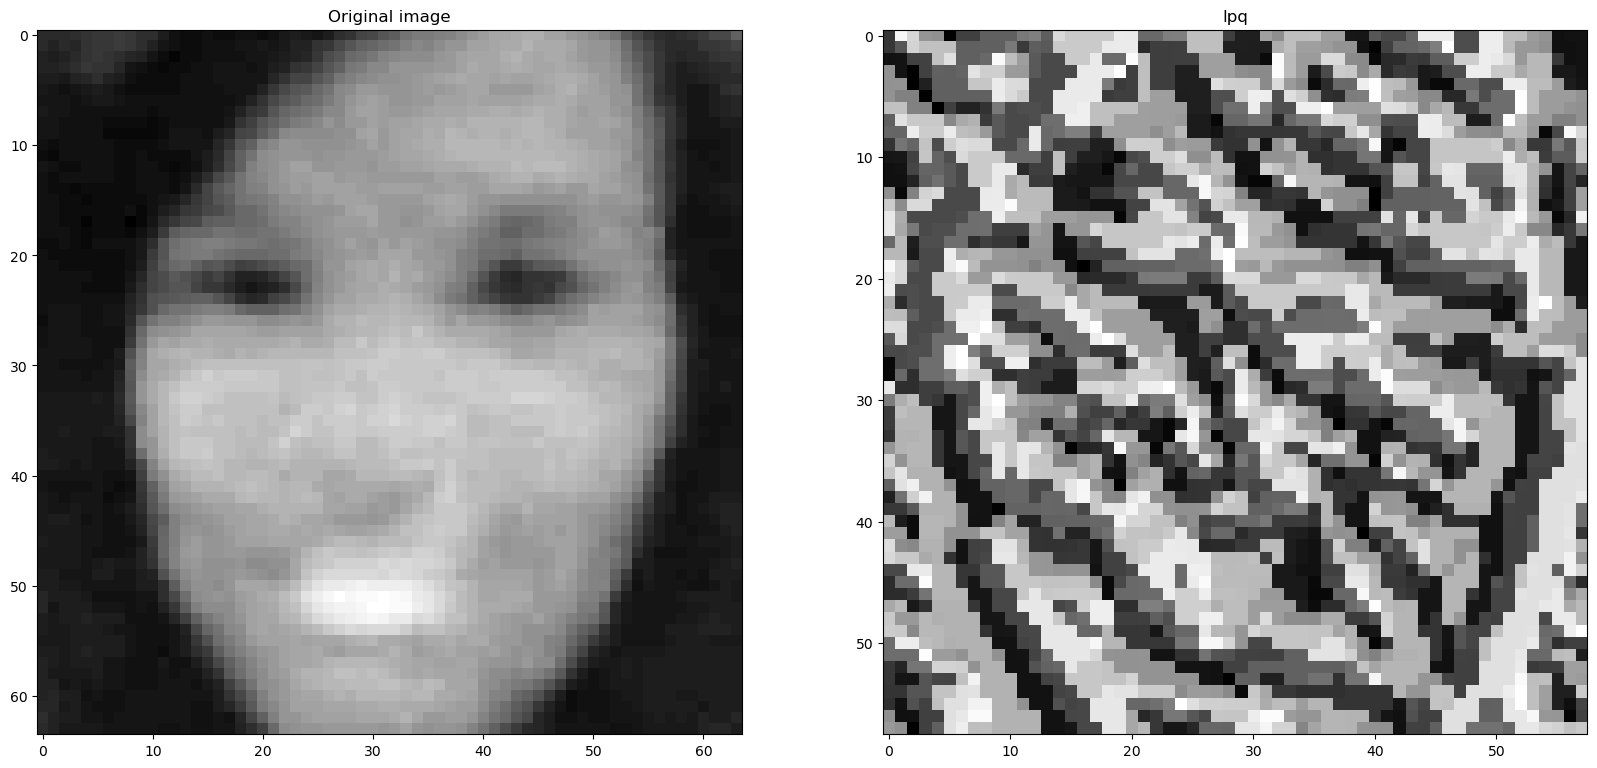

sift
(3, 3)


AxisError: axis 2 is out of bounds for array of dimension 2

In [1]:
import sys
sys.path.append('/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/codes/extractors/execute/')
from applying import*
import os
import numpy as np
sys.path.append('/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/codes/preprocessing/')

from pre_processing import *

path2save = '/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/FeaturesExtracted'
path ='/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/datasets' 
files = os.listdir(path)

for dataset in files:
    print('dataset',dataset)
    path2 = os.path.join(path, dataset)
    files2 = os.listdir(path2)
    for conjunto in files2:
        print('conjunto',conjunto)
        if dataset == 'MiniDataset':
            path3 = os.path.join(path2, conjunto)
            files3 = os.listdir(path3)
            #print(path3, files3)
            tokens = [i for i in range(len(files3))]
            for image,token in zip(files3,tokens):
                print(image, 'IMAGE')
                read = ReadImage(path3, image)
                image2 = read.read_file()
                process = ProcessingImage(image2)
                if process.extractor() is None:
                    continue
                else:
                    [ch1_hsv, ch2_hsv, ch3_hsv],[ch1_ycbcr, ch2_ycbcr, ch3_ycbcr] =process.extractor()
                    app = ApplyingExtractors( hsv_channels = [ch1_hsv, ch2_hsv, ch3_hsv],
                                  ycbcr_channels = [ch1_ycbcr, ch2_ycbcr, ch3_ycbcr]
                                )
                    savecomplete =path2save+f'/{dataset}/{conjunto}/'
                    os.makedirs(savecomplete, exist_ok=True)
                    app.saving_features_extracted(path2save = savecomplete,
                                     token = token)  
            ### FOR IMAGE IN  FILES 3 APLICAR E SALVAR 
        else: 
           path3 = os.path.join(path2, conjunto)
           files3 = os.listdir(path3)
           tokens = [i for i in range(len(files3))]
           for torf in files3:
               path4 = os.path.join(path3, torf)
               files4 = os.listdir(path4)
               for image,token  in zip(files4,tokens):
                read = ReadImage(path4, image)
                image2 = read.read_file()
                process = ProcessingImage(image2)
                if process.extractor() is None:
                    continue
                else:
                    [ch1_hsv, ch2_hsv, ch3_hsv],[ch1_ycbcr, ch2_ycbcr, ch3_ycbcr] =process.extractor()
                    app = ApplyingExtractors( hsv_channels = [ch1_hsv, ch2_hsv, ch3_hsv],
                                  ycbcr_channels = [ch1_ycbcr, ch2_ycbcr, ch3_ycbcr]
                                )
                    savecomplete =path2save+f'/{dataset}/{conjunto}/'
                    os.makedirs(savecomplete, exist_ok=True)
                    app.saving_features_extracted(path2save = savecomplete,
                                     token = token)  
                   #APLICAR FOR IMAG IN FILES 4 

In [5]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
import time

path_develop1 = '/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/DatasetsComplete/DEVELOP/RI-LBP/'
path_evaluation1 = '/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/DatasetsComplete/TEST/RI-LBP/'
path_train1 =  '/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/DatasetsComplete/TRAIN/RI-LBP/'

path_develop2 = '/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/DatasetsComplete/DEVELOP/SIFT/'
path_evaluation2 = '/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/DatasetsComplete/TEST/SIFT/'
path_train2 =  '/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/ProjetoVisao/DatasetsComplete/TRAIN/SIFT/'

X_test_sift = np.load(path_develop2+f'X_train.npy', allow_pickle=True)
y_test_sift =np.load(path_develop2+f'y_train.npy', allow_pickle=True)
svm = SVC(kernel='linear', probability=True, verbose=True)
svm.fit(X_test_sift, y_test_sift)


[LibSVM].................................................................................................................................
*.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

SVC(kernel='linear', probability=True, verbose=True)

In [11]:
y_test_scores_ri1 = svm.predict_proba(X_test)[:, 1]

In [10]:
X_test = np.load(path_evaluation2+f'X_train.npy', allow_pickle=True)
y_test =np.load(path_evaluation2+f'y_train.npy', allow_pickle=True)